111


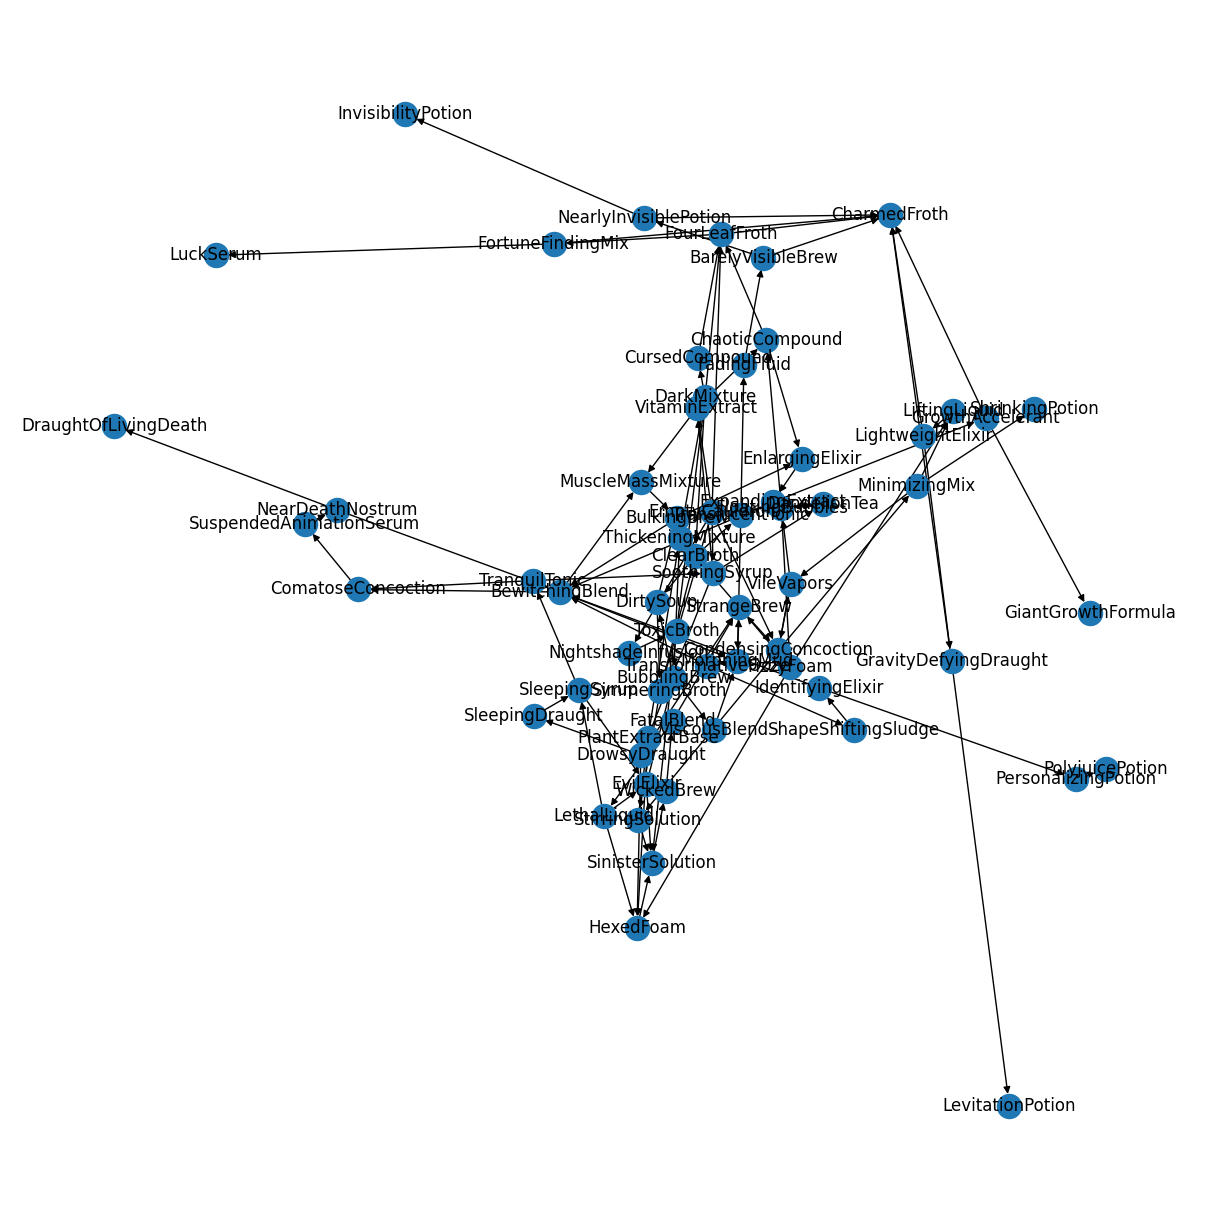

In [8]:
# import and read in .dot graph
import networkx as nx
import matplotlib.pyplot as plt
import re

def parse_dot_file(dot_file_content):
    # remove all comments
    dot_file_content = re.sub(r'//.*', '', dot_file_content)

    # Extracting nodes
    node_matches = re.findall(r'(\w+)\s*\[.*?\];', dot_file_content)
    
    # Extracting transitions
    transition_matches = re.findall(r'(\w+)\s*->\s*(\w+)(?:.*)?;', dot_file_content)
    print(len(transition_matches))
    
    # Create a graph representation
    graph = nx.DiGraph()

    for from_node, to_node  in transition_matches:
        graph.add_edge(from_node, to_node)
    
    return graph

graph = nx.DiGraph()

# Test
with open('state-graph.dot', 'r') as f:
    content = f.read()
    graph = parse_dot_file(content)
    plt.figure(figsize=(12, 12))
    nx.draw(graph, with_labels=True)
    plt.show()

In [12]:
# analyze outgoing edges and incoming edges for a recipe path

def analyze_recipe_path(graph, recipe_path):
  incoming_edges = 0
  outgoing_edges = 0

  for node in recipe_path:
    outgoing_edges += graph.out_degree(node) - 1 # -1 for the incoming edge from the previous node
    incoming_edges += graph.in_degree(node) - 1 # -1 for the outgoing edge to the next node

  outgoing_edges += 1 # for the last node

  print("Outgoing edges: {}".format(outgoing_edges))
  print("Incoming edges: {}".format(incoming_edges))
    
  


# recipe paths
luck_serum = ['FourLeafFroth', 'FortuneFindingMix', 'LuckSerum']
shrinking_potion = ['CondensingConcoction', 'MinimizingMix', 'ShrinkingPotion']
sleeping_draught = ['SoothingSyrup', 'DrowsyDraught', 'SleepingDraught']
invisibility_potion = ['SimmeringBroth', 'ClearBroth', 'TranslucentTonic', 'FadingFluid', 'BarelyVisibleBrew', 'NearlyInvisiblePotion', 'InvisibilityPotion']
levitation_potion = ['DandelionTea', 'FloatingBubbles', 'FizzyFoam', 'LiftingLiquid', 'LightweightElixir', 'GravityDefyingDraught', 'LevitationPotion']
giant_growth_formula = ['VitaminExtract', 'MuscleMassMixture', 'BulkingBrew', 'EnlargingElixir', 'ExpandingExtract', 'GrowthAccelerant', 'GiantGrowthFormula']
polyjuice_potion = ['SimmeringBroth', 'StirringSolution', 'PlantExtractBase', 'ThickeningMixture', 'BubblingBrew', 'ViscousBlend', 'MorphingMud', 'TransformativeOoze', 'ShapeShiftingSludge', 'IdentifyingElixir', 'PersonalizingPotion', 'PolyjuicePotion']
draught_of_living_death = ['NightshadeInfusion', 'ToxicBroth', 'SinisterSolution', 'WickedBrew', 'FatalBlend', 'LethalLiquid', 'SleepingSyrup', 'TranquilTonic', 'ComatoseConcoction', 'SuspendedAnimationSerum', 'NearDeathNostrum', 'DraughtOfLivingDeath']

paths = [luck_serum, shrinking_potion, sleeping_draught, invisibility_potion, levitation_potion, giant_growth_formula, polyjuice_potion, draught_of_living_death]

# Test

for path in paths:
  print("Analyzing path for {}".format(path[-1]))
  analyze_recipe_path(graph, path)
  print('\n')


Analyzing path for LuckSerum
Outgoing edges: 2
Incoming edges: 3


Analyzing path for ShrinkingPotion
Outgoing edges: 4
Incoming edges: 2


Analyzing path for SleepingDraught
Outgoing edges: 5
Incoming edges: 1


Analyzing path for InvisibilityPotion
Outgoing edges: 5
Incoming edges: 3


Analyzing path for LevitationPotion
Outgoing edges: 5
Incoming edges: 3


Analyzing path for GiantGrowthFormula
Outgoing edges: 4
Incoming edges: 4


Analyzing path for PolyjuicePotion
Outgoing edges: 8
Incoming edges: 5


Analyzing path for DraughtOfLivingDeath
Outgoing edges: 8
Incoming edges: 5




In [18]:
import re
import os
import yaml

def extract_content_config(yaml_file):
    with open(yaml_file, 'r') as f:
        # ignore first 3 lines
        for _ in range(3):
            f.readline()
        content = f.read()
        data = yaml.load(content, Loader=yaml.FullLoader)        
    
    if 'MonoBehaviour' not in data:
        return None

    state_name = data['MonoBehaviour']['m_Name']
    content_config = data['MonoBehaviour']['contentConfig']

    # Convert content_config to a dictionary of string key-value pairs
    attributes = {}
    for key, value in content_config.items():
        if isinstance(value, dict):
            # Convert color values to a comma-separated string
            attributes[key] = f'"{value["r"]}, {value["g"]}, {value["b"]}, {value["a"]}"'
        else:
            attributes[key] = f'"{value}"'
    return state_name, attributes

def update_dot_file(dot_file, state_name, attributes):
    with open(dot_file, 'r') as f:
        content = f.readlines()

    # Construct the new attributes string with ";" as delimiter
    new_attributes = ';'.join([f'{key}={value}' for key, value in attributes.items()])

    # Update the .dot file
    updated_content = []
    # Create a regex pattern to match state lines
    state_pattern = re.compile(rf'(?<! -> )({state_name}\s*\[.*?\];)')
    for line in content:
        if state_pattern.search(line):
            # insert new attributes before the closing bracket
            line = line.replace('];', f'{new_attributes}];')
        updated_content.append(line)

    # Write the updated content back to the .dot file
    with open(dot_file, 'w') as f:
        f.writelines(updated_content)

# Example usage
state_assets_path = 'Cauldron Chaos/Assets/CauldronChaos/Data/States/'
dot_file = 'state-graph.dot'

for asset in os.listdir(state_assets_path):
    if asset.endswith('.asset'):
        yaml_file = os.path.join(state_assets_path, asset)
        state_name, attributes = extract_content_config(yaml_file)
        print(state_name + ':', attributes)
        if state_name is not None:
            update_dot_file(dot_file, state_name, attributes)


BarelyVisibleBrew: {'BaseColor': '"0.6981132, 0.6981132, 0.6981132, 1"', 'TopColor': '"0.5047614, 0.51204467, 0.53773576, 1"', 'Shades': '"3"', 'WaveStrength': '"14.06"', 'WaveHeight': '"0.29"', 'WaveSpeed': '"0.01"', 'WaveRotation': '"358.67966"', 'BubbleSpeed': '"0.2"', 'BubbleDensity': '"0.88"', 'BubbleSpacing': '"0.21673575"', 'BubbleStrength': '"1.57"', 'CircleSize': '"0.94"'}
BewitchingBlend: {'BaseColor': '"0.34292766, 0.78680384, 0.5573541, 1"', 'TopColor': '"0.6378277, 0.8289486, 0.12276879, 1"', 'Shades': '"3"', 'WaveStrength': '"12.884688"', 'WaveHeight': '"0.7986747"', 'WaveSpeed': '"0.08497991"', 'WaveRotation': '"344.75342"', 'BubbleSpeed': '"1.7737212"', 'BubbleDensity': '"1.8343577"', 'BubbleSpacing': '"0.40481982"', 'BubbleStrength': '"1.2950728"', 'CircleSize': '"0.94"'}
BubblingBrew: {'BaseColor': '"0.59284174, 0.06445384, 0.23614326, 1"', 'TopColor': '"0.3168986, 0.7086308, 0.3146736, 1"', 'Shades': '"3"', 'WaveStrength': '"10.195803"', 'WaveHeight': '"0.5390123"', 

In [21]:
def clean_up(file):
  '''truncate all floats to 3 decimal places'''
  updated = []
  with open('state-graph.dot', 'r') as f:
    content = f.readlines()
  for line in content:
    if re.search(r'(\d+\.\d{3})\d+', line):
      line = re.sub(r'(\d+\.\d{3})\d+', r'\1', line)
    updated.append(line)

  with open('state-graph.dot', 'w') as f:
    f.writelines(updated)

# Test
f = 'state-graph.dot'
clean_up(f)